In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_and_resize(link, w=640):
    img = cv.imread(link,0)
    img = cv.resize(img, (w, w))
    # img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

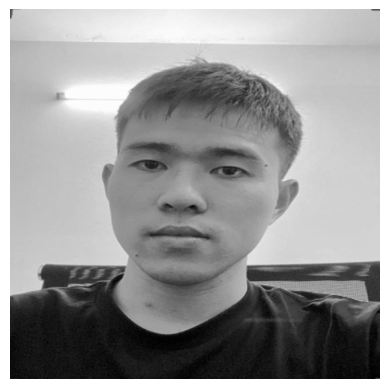

In [4]:
C = read_and_resize('C.jpg')
plt.axis('off')
plt.imshow(C, cmap='gray')

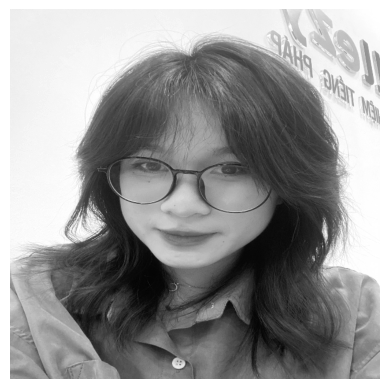

In [5]:
N = read_and_resize('N.jpg')
plt.axis('off')
plt.imshow(N, cmap='gray')

In [6]:
import numpy
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
import math

def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
   centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
   centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

   def gaussian(i,j):
      coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
      return 1 - coefficient if highPass else coefficient

   return numpy.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])

def filterDFT(imageMatrix, filterMatrix):
   shiftedDFT = fftshift(fft2(imageMatrix))
   filteredDFT = shiftedDFT * filterMatrix
   return ifft2(ifftshift(filteredDFT))

def lowPass(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))

def highPass(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))





In [7]:
def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
   highPassed = highPass(highFreqImg, sigmaHigh)
   lowPassed = lowPass(lowFreqImg, sigmaLow)

   return highPassed + lowPassed

In [ ]:
cv.cvtColor(numpy.real(lowPassedMarilyn))

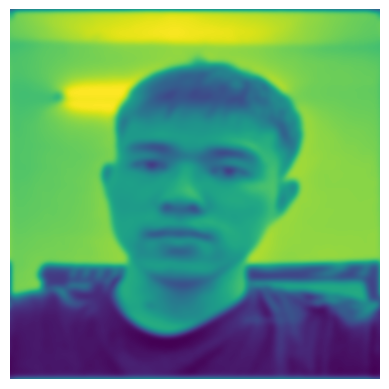

In [8]:
# marilyn = ndimage.imread("marilyn.png", flatten=True)
lowPassedMarilyn = lowPass(C, 20)
# misc.imsave("low-passed-marilyn.png", numpy.real(lowPassedMarilyn))
plt.axis('off')
plt.imshow(numpy.real(lowPassedMarilyn))

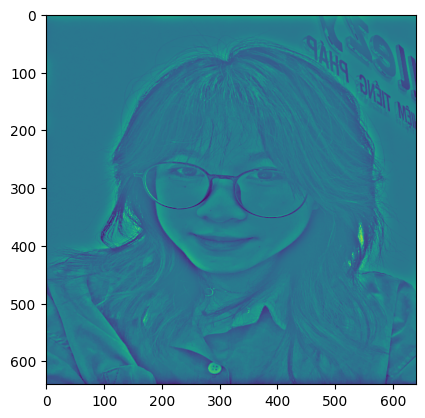

In [9]:
# marilyn = ndimage.imread("marilyn.png", flatten=True)
lowPassedMarilyn = highPass(N, 10)
# misc.imsave("low-passed-marilyn.png", numpy.real(lowPassedMarilyn))
plt.imshow(numpy.real(lowPassedMarilyn))

In [10]:
def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
   highPassed = highPass(highFreqImg, sigmaHigh)
   lowPassed = lowPass(lowFreqImg, sigmaLow)

   return highPassed + lowPassed

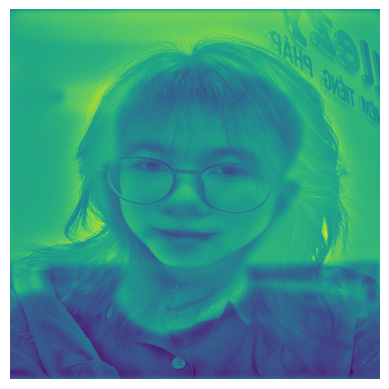

In [11]:
hib = hybridImage(N, C, 5, 20)
plt.axis('off')
plt.imshow(numpy.real(hib))

In [12]:
# Normalize the real part to the range 0 to 255
real_part_normalized = np.abs(hib)
real_part_normalized = cv.normalize(real_part_normalized, None, 0, 255, cv.NORM_MINMAX)

# Convert to unsigned 8-bit integer
real_part_display = np.uint8(real_part_normalized)
cv.imshow('Real Part of Fourier Transform', real_part_display)
cv.waitKey(0)
cv.destroyAllWindows()


In [14]:


threshold1 = 5
threshold2 = 20


def change_threshold1(value):
    global threshold1
    threshold1 = value  
    display_again()

def change_threshold2(value):
    global threshold2
    threshold2 = value
    display_again()



cv.namedWindow('cuongpc')




def display_again():
    hib = hybridImage(C, N, threshold1, threshold2)
    real_part_normalized = np.abs(hib)
    real_part_normalized = cv.normalize(real_part_normalized, None, 0, 255, cv.NORM_MINMAX)

    # Convert to unsigned 8-bit integer
    real_part_display = np.uint8(real_part_normalized)
    cv.imshow('cuongpc',real_part_display)


cv.createTrackbar('Threshold1', 'cuongpc', 5, 100, change_threshold1)
cv.setTrackbarMin('Threshold1', 'cuongpc', 1) 
cv.createTrackbar('Threshold2', 'cuongpc', 20, 100, change_threshold2)
cv.setTrackbarMin('Threshold2', 'cuongpc', 1) 


while True:
    display_again()
    k = cv.waitKey(10) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()